In [9]:
import sklearn
import numpy as np
import pandas as pd
import os
import glob
import pandera as pa

from pandera import Check, Column, DataFrameSchema
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [10]:
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

sets = []
  
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, skiprows=15)
      
    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    sets.append(df)
    print()

Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0357.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0357.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0360,12,0.0,0.0,0.3972,-90.3187,0.0,109.2575,0.0038,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
1,0.05,0.0490,12,0.0,0.0,-2.4374,-106.6549,0.0,109.2575,0.0038,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
2,0.10,0.0843,12,0.0,0.0,-11.5614,12.0517,0.0,109.2544,0.0038,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
3,0.15,0.0201,12,0.0,0.0,-3.0454,44.9417,0.0,109.2512,0.0038,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
4,0.20,0.0624,12,0.0,0.0,-4.8717,-35.7727,0.0,109.2575,0.0038,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,63.75,0.0604,11,0.0,0.0,-12.4684,83.2707,0.0,105.2541,0.0055,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0
1276,63.80,0.0604,11,0.0,0.0,-12.4684,83.2707,0.0,105.2541,0.0055,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0
1277,63.85,0.0604,11,0.0,0.0,-12.4684,83.2707,0.0,105.2541,0.0055,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0
1278,63.90,0.0604,11,0.0,0.0,-12.4684,83.2707,0.0,105.2541,0.0055,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0356.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0356.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0000,13,0.0,0.0,0.0000,0.0000,0.0,105.5464,0.0115,...,0,0,0,0,100.0,153.30,100.0,100.0,100.0,100.0
1,0.05,0.0784,13,0.0,0.0,-28.2013,44.6256,0.0,105.5469,0.0114,...,0,0,0,0,100.0,153.30,100.0,100.0,100.0,100.0
2,0.10,0.0540,13,0.0,0.0,-38.7473,180.0000,0.0,105.5552,0.0113,...,0,0,0,0,100.0,153.30,100.0,100.0,100.0,100.0
3,0.15,0.0944,13,0.0,0.0,-24.9215,179.8717,0.0,105.5623,0.0112,...,0,0,0,0,100.0,154.24,100.0,100.0,100.0,100.0
4,0.20,0.1298,13,0.0,0.0,-20.6662,117.2223,0.0,105.5639,0.0111,...,0,0,0,0,100.0,155.24,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,151.75,0.1544,13,0.0,0.0,-21.3250,-141.7695,0.0,104.8891,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0
3036,151.80,0.1544,13,0.0,0.0,-21.3250,-141.7695,0.0,104.8891,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0
3037,151.85,0.1544,13,0.0,0.0,-21.3250,-141.7695,0.0,104.8891,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0
3038,151.90,0.1544,13,0.0,0.0,-21.3250,-141.7695,0.0,104.8891,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0354.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0354.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0360,12,0.0,0.0,0.3956,-90.3174,0.0,109.6419,0.0077,...,0,0,0,0,108.8,162.40,100.0,100.0,100.0,100.0
1,0.05,0.0360,12,0.0,0.0,0.3956,-90.3174,0.0,109.6405,0.0077,...,0,0,0,0,104.4,161.85,100.0,100.0,100.0,100.0
2,0.10,0.0360,12,0.0,0.0,0.0198,-4.8174,0.0,109.6319,0.0077,...,0,0,0,0,100.0,161.30,100.0,100.0,100.0,100.0
3,0.15,0.0099,12,0.0,0.0,-0.1088,24.6627,0.0,109.6380,0.0076,...,0,0,0,0,100.0,160.70,100.0,100.0,100.0,100.0
4,0.20,0.0860,12,0.0,0.0,10.9901,-24.2104,0.0,109.6342,0.0076,...,0,0,0,0,100.0,160.10,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,230.75,0.0604,13,0.0,0.0,-3.2603,-40.8413,0.0,104.5328,0.0032,...,0,0,0,0,100.0,100.00,100.0,100.0,100.0,100.0
4616,230.80,0.0604,13,0.0,0.0,-3.2603,-40.8413,0.0,104.5328,0.0032,...,0,0,0,0,100.0,100.00,100.0,100.0,100.0,100.0
4617,230.85,0.0604,13,0.0,0.0,-3.2603,-40.8413,0.0,104.5328,0.0032,...,0,0,0,0,100.0,100.00,100.0,100.0,100.0,100.0
4618,230.90,0.0604,13,0.0,0.0,-3.2603,-40.8413,0.0,104.5328,0.0032,...,0,0,0,0,100.0,100.00,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0368.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0368.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0360,16,0.0,0.0,-38.7473,180.0000,0.0,115.2030,0.0044,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
1,0.05,0.0784,16,0.0,0.0,-12.5664,105.6919,0.0,115.2034,0.0044,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
2,0.10,0.0957,15,0.0,0.0,0.9538,102.2328,0.0,115.2045,0.0044,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
3,0.15,0.1536,15,0.0,0.0,-4.1175,117.4629,0.0,115.1997,0.0044,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
4,0.20,0.0360,15,0.0,0.0,-0.3956,89.6826,0.0,115.1982,0.0044,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,119.75,0.1532,15,0.0,0.0,10.4018,-0.2446,0.0,110.1161,0.0031,...,0,0,0,0,100.0,122.7,100.0,100.0,100.0,100.0
2396,119.80,0.1532,15,0.0,0.0,10.4018,-0.2446,0.0,110.1161,0.0031,...,0,0,0,0,100.0,122.7,100.0,100.0,100.0,100.0
2397,119.85,0.1532,15,0.0,0.0,10.4018,-0.2446,0.0,110.1161,0.0031,...,0,0,0,0,100.0,122.7,100.0,100.0,100.0,100.0
2398,119.90,0.1532,15,0.0,0.0,10.4018,-0.2446,0.0,110.1161,0.0031,...,0,0,0,0,100.0,122.7,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0369.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0369.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0360,14,0.0,0.0,-51.2512,-0.8139,0.0,111.7354,0.0093,...,0,0,0,0,100.0,142.2,100.0,100.0,100.0,100.0
1,0.05,0.0360,14,0.0,0.0,-38.7460,180.0000,0.0,111.7196,0.0092,...,0,0,0,0,100.0,142.2,100.0,100.0,100.0,100.0
2,0.10,0.0540,14,0.0,0.0,-19.5717,134.8406,0.0,111.7086,0.0092,...,0,0,0,0,100.0,142.2,100.0,100.0,100.0,100.0
3,0.15,0.0562,14,0.0,0.0,-25.4534,65.5444,0.0,111.6964,0.0091,...,0,0,0,0,100.0,142.2,100.0,100.0,100.0,100.0
4,0.20,0.0882,14,0.0,0.0,-22.2372,-26.6716,0.0,111.6960,0.0090,...,0,0,0,0,100.0,142.2,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,30.75,0.0225,13,0.0,0.0,24.2163,0.0000,0.0,111.6847,0.0050,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
616,30.80,0.0225,13,0.0,0.0,24.2163,0.0000,0.0,111.6847,0.0050,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
617,30.85,0.0225,13,0.0,0.0,24.2163,0.0000,0.0,111.6847,0.0050,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
618,30.90,0.0225,13,0.0,0.0,24.2163,0.0000,0.0,111.6847,0.0050,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0355.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0355.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0805,12,0.0,0.0,20.7903,-107.7394,0.0,106.9753,0.0057,...,0,0,0,0,100.0,114.1,100.0,100.0,100.0,100.0
1,0.05,0.0397,12,0.0,0.0,1.8595,-22.8283,0.0,106.9676,0.0057,...,0,0,0,0,100.0,114.1,100.0,100.0,100.0,100.0
2,0.10,0.0566,12,0.0,0.0,5.7909,17.3590,0.0,106.9715,0.0057,...,0,0,0,0,100.0,114.1,100.0,100.0,100.0,100.0
3,0.15,0.0426,12,0.0,0.0,39.7700,98.1620,0.0,106.9754,0.0056,...,0,0,0,0,100.0,114.1,100.0,100.0,100.0,100.0
4,0.20,0.0805,12,0.0,0.0,20.7903,-107.7394,0.0,106.9676,0.0056,...,0,0,0,0,100.0,114.1,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,148.75,0.0572,14,0.0,0.0,-17.8909,6.2009,0.0,105.9417,0.0063,...,0,0,0,0,100.0,119.4,100.0,100.0,100.0,100.0
2976,148.80,0.0572,14,0.0,0.0,-17.8909,6.2009,0.0,105.9417,0.0063,...,0,0,0,0,100.0,119.4,100.0,100.0,100.0,100.0
2977,148.85,0.0572,14,0.0,0.0,-17.8909,6.2009,0.0,105.9417,0.0063,...,0,0,0,0,100.0,119.4,100.0,100.0,100.0,100.0
2978,148.90,0.0572,14,0.0,0.0,-17.8909,6.2009,0.0,105.9417,0.0063,...,0,0,0,0,100.0,119.4,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0362.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0362.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0882,12,0.0,0.0,22.5863,-154.2582,0.0,107.6003,0.0033,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
1,0.05,0.0824,12,0.0,0.0,24.1610,96.0610,0.0,107.6108,0.0033,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
2,0.10,0.0509,12,0.0,0.0,25.9564,51.8509,0.0,107.6284,0.0033,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
3,0.15,0.1178,12,0.0,0.0,34.9839,27.4162,0.0,107.6284,0.0033,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
4,0.20,0.0904,12,0.0,0.0,32.4652,-41.0555,0.0,107.6284,0.0033,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,124.75,0.1331,14,0.0,0.0,12.4933,-92.4162,0.0,107.0550,0.0049,...,0,0,0,0,100.0,110.0,100.0,100.0,100.0,100.0
2496,124.80,0.1331,14,0.0,0.0,12.4933,-92.4162,0.0,107.0550,0.0049,...,0,0,0,0,100.0,110.0,100.0,100.0,100.0,100.0
2497,124.85,0.1331,14,0.0,0.0,12.4933,-92.4162,0.0,107.0550,0.0049,...,0,0,0,0,100.0,110.0,100.0,100.0,100.0,100.0
2498,124.90,0.1331,14,0.0,0.0,12.4933,-92.4162,0.0,107.0550,0.0049,...,0,0,0,0,100.0,110.0,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0363.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0363.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,12.2347,7,0.0,0.0,-1.6974,73.3982,0.0,112.7786,0.0435,...,0,0,0,0,100.0,212.30,0.0,0.0,0.0,0.0
1,0.05,12.2347,7,0.0,0.0,-1.6974,73.3982,0.0,112.7786,0.0435,...,0,0,0,0,100.0,212.30,0.0,0.0,0.0,0.0
2,0.10,12.2347,7,0.0,0.0,-1.6974,73.3982,0.0,112.7786,0.0435,...,0,0,0,0,100.0,212.30,0.0,0.0,0.0,0.0
3,0.15,12.2347,7,0.0,0.0,-1.6974,73.3982,0.0,112.7786,0.0435,...,0,0,0,0,100.0,212.30,0.0,0.0,0.0,0.0
4,0.20,12.2347,7,0.0,0.0,-1.6974,73.3982,0.0,112.7786,0.0435,...,0,0,0,0,100.0,212.30,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20.75,0.0496,7,0.0,0.0,6.0964,-0.3532,0.0,111.4058,0.0082,...,0,0,0,0,100.0,175.12,100.0,100.0,100.0,100.0
416,20.80,0.0496,7,0.0,0.0,6.0964,-0.3532,0.0,111.4058,0.0082,...,0,0,0,0,100.0,175.12,100.0,100.0,100.0,100.0
417,20.85,0.0496,7,0.0,0.0,6.0964,-0.3532,0.0,111.4058,0.0082,...,0,0,0,0,100.0,175.12,100.0,100.0,100.0,100.0
418,20.90,0.0496,7,0.0,0.0,6.0964,-0.3532,0.0,111.4058,0.0082,...,0,0,0,0,100.0,175.12,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0361.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0361.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.2219,8,0.0,0.0,-56.3330,-62.9733,0.0,108.0394,0.0649,...,0,0,0,0,100.0,135.70,100.0,100.0,100.0,100.0
1,0.05,0.1778,8,0.0,0.0,-62.8897,-97.4897,0.0,108.1695,0.0611,...,0,0,0,0,100.0,135.70,100.0,100.0,100.0,100.0
2,0.10,0.2883,8,0.0,0.0,-40.5667,-16.3253,0.0,108.2310,0.0576,...,0,0,0,0,100.0,135.70,100.0,100.0,100.0,100.0
3,0.15,0.2745,8,0.0,0.0,-41.2576,-111.5450,0.0,108.2536,0.0543,...,0,0,0,0,100.0,135.88,100.0,100.0,100.0,100.0
4,0.20,0.2835,8,0.0,0.0,-34.7122,-69.0325,0.0,108.2989,0.0512,...,0,0,0,0,100.0,136.68,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,122.75,0.0805,12,0.0,0.0,21.4609,80.1118,0.0,107.3105,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0
2456,122.80,0.0805,12,0.0,0.0,21.4609,80.1118,0.0,107.3105,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0
2457,122.85,0.0805,12,0.0,0.0,21.4609,80.1118,0.0,107.3105,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0
2458,122.90,0.0805,12,0.0,0.0,21.4609,80.1118,0.0,107.3105,0.0033,...,0,0,0,0,100.0,114.60,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0360.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0360.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.1484,14,0.0,0.0,-10.5111,-81.4373,0.0,108.7294,0.0026,...,0,0,0,0,100.0,124.3,100.0,100.0,100.0,100.0
1,0.05,0.1524,14,0.0,0.0,-9.1476,-82.5475,0.0,108.7284,0.0026,...,0,0,0,0,100.0,124.3,100.0,100.0,100.0,100.0
2,0.10,0.1630,14,0.0,0.0,-2.3481,-103.8364,0.0,108.7215,0.0026,...,0,0,0,0,100.0,124.3,100.0,100.0,100.0,100.0
3,0.15,0.1180,14,0.0,0.0,-2.8447,8.6636,0.0,108.7165,0.0026,...,0,0,0,0,100.0,124.3,100.0,100.0,100.0,100.0
4,0.20,0.2077,14,0.0,0.0,-9.2308,59.4504,0.0,108.7067,0.0026,...,0,0,0,0,100.0,124.3,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,39.75,0.0787,13,0.0,0.0,-14.7831,-104.0001,0.0,108.1879,0.0029,...,0,0,0,0,100.0,119.4,0.0,0.0,0.0,0.0
796,39.80,0.0787,13,0.0,0.0,-14.7831,-104.0001,0.0,108.1879,0.0029,...,0,0,0,0,100.0,119.4,0.0,0.0,0.0,0.0
797,39.85,0.0787,13,0.0,0.0,-14.7831,-104.0001,0.0,108.1879,0.0029,...,0,0,0,0,100.0,119.4,0.0,0.0,0.0,0.0
798,39.90,0.0787,13,0.0,0.0,-14.7831,-104.0001,0.0,108.1879,0.0029,...,0,0,0,0,100.0,119.4,0.0,0.0,0.0,0.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0374.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0374.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0360,14,0.0,0.0,-51.2512,-0.8139,0.0,108.3840,0.0060,...,0,0,0,0,100.0,179.7,100.0,100.0,100.0,100.0
1,0.05,0.0351,14,0.0,0.0,-49.9699,-0.7935,0.0,108.3840,0.0060,...,0,0,0,0,100.0,179.7,100.0,100.0,100.0,100.0
2,0.10,0.0000,14,0.0,0.0,0.0000,0.0000,0.0,108.3835,0.0060,...,0,0,0,0,100.0,179.7,100.0,100.0,100.0,100.0
3,0.15,0.0189,14,0.0,0.0,-0.2086,47.0826,0.0,108.3823,0.0060,...,0,0,0,0,100.0,179.7,100.0,100.0,100.0,100.0
4,0.20,0.0360,14,0.0,0.0,0.2185,-49.8188,0.0,108.3822,0.0060,...,0,0,0,0,100.0,179.7,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,24.75,0.1440,14,0.0,0.0,0.3973,-90.3188,0.0,107.7535,0.0048,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
496,24.80,0.1440,14,0.0,0.0,0.3973,-90.3188,0.0,107.7535,0.0048,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
497,24.85,0.1440,14,0.0,0.0,0.3973,-90.3188,0.0,107.7535,0.0048,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
498,24.90,0.1440,14,0.0,0.0,0.3973,-90.3188,0.0,107.7535,0.0048,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0358.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0358.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.2902,11,0.0,0.0,4.0570,84.1159,0.0,106.3454,0.0039,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
1,0.05,0.1986,11,0.0,0.0,30.5478,98.8359,0.0,106.3568,0.0039,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
2,0.10,0.2000,11,0.0,0.0,24.9663,-115.7889,0.0,106.3635,0.0039,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
3,0.15,0.2433,11,0.0,0.0,11.7399,-80.4436,0.0,106.3490,0.0039,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
4,0.20,0.1689,11,0.0,0.0,-5.8240,25.0166,0.0,106.3173,0.0039,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,33.75,0.0395,13,0.0,0.0,-20.1145,-99.3166,0.0,107.0875,0.0034,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0
676,33.80,0.0395,13,0.0,0.0,-20.1145,-99.3166,0.0,107.0875,0.0034,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0
677,33.85,0.0395,13,0.0,0.0,-20.1145,-99.3166,0.0,107.0875,0.0034,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0
678,33.90,0.0395,13,0.0,0.0,-20.1145,-99.3166,0.0,107.0875,0.0034,...,0,0,0,0,100.0,156.9,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0370.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0370.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0624,13,0.0,0.0,-4.8717,-35.7712,0.0,111.3314,0.0043,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
1,0.05,0.0078,13,0.0,0.0,-0.6090,-4.4714,0.0,111.3191,0.0043,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
2,0.10,0.0457,13,0.0,0.0,-35.3787,170.5344,0.0,111.3156,0.0043,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
3,0.15,0.0712,12,0.0,0.0,-7.3741,65.1722,0.0,111.3033,0.0043,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
4,0.20,0.0450,13,0.0,0.0,0.2472,-56.4484,0.0,111.3033,0.0043,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,114.75,0.0890,15,0.0,0.0,-32.7236,144.2290,0.0,107.6443,0.0033,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
2296,114.80,0.0890,15,0.0,0.0,-32.7236,144.2290,0.0,107.6443,0.0033,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
2297,114.85,0.0890,15,0.0,0.0,-32.7236,144.2290,0.0,107.6443,0.0033,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
2298,114.90,0.0890,15,0.0,0.0,-32.7236,144.2290,0.0,107.6443,0.0033,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0364.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0364.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0360,9,0.0000,0.0000,38.7473,0.0000,0.0,111.3960,0.0077,...,0,0,0,0,100.0,205.8,100.0,100.0,100.0,100.0
1,0.05,0.0450,9,0.0000,0.0000,-0.3954,89.6827,0.0,111.4101,0.0076,...,0,0,0,0,100.0,205.8,100.0,100.0,100.0,100.0
2,0.10,0.0540,9,0.0000,0.0000,0.0000,-0.3173,0.0,111.4141,0.0075,...,0,0,0,0,100.0,205.8,100.0,100.0,100.0,100.0
3,0.15,0.0985,9,0.0000,0.0000,2.3634,-109.1544,0.0,111.4123,0.0073,...,0,0,0,0,100.0,205.8,100.0,100.0,100.0,100.0
4,0.20,0.0882,9,0.0000,0.0000,-3.2811,-55.2275,0.0,111.4119,0.0072,...,0,0,0,0,100.0,205.8,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,73.75,2.5629,11,0.0107,-0.1524,-3.1410,-94.6632,0.0,110.9934,0.0025,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
1476,73.80,2.5629,11,0.0107,-0.1524,-3.1410,-94.6632,0.0,110.9934,0.0025,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
1477,73.85,2.5629,11,0.0107,-0.1524,-3.1410,-94.6632,0.0,110.9934,0.0025,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0
1478,73.90,2.5629,11,0.0107,-0.1524,-3.1410,-94.6632,0.0,110.9934,0.0025,...,0,0,0,0,100.0,112.8,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0365.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0365.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0720,13,0.0,0.0,0.3973,-90.3188,0.0,114.7631,0.0033,...,0,0,0,0,100.0,191.1,100.0,100.0,100.0,100.0
1,0.05,0.0360,13,0.0,0.0,-9.3885,-22.7391,0.0,114.7631,0.0033,...,0,0,0,0,100.0,191.1,100.0,100.0,100.0,100.0
2,0.10,0.0749,13,0.0,0.0,-29.5288,179.9141,0.0,114.7631,0.0033,...,0,0,0,0,100.0,191.1,100.0,100.0,100.0,100.0
3,0.15,0.0285,13,0.0,0.0,-5.0779,44.9571,0.0,114.7631,0.0033,...,0,0,0,0,100.0,191.1,100.0,100.0,100.0,100.0
4,0.20,0.0000,13,0.0,0.0,0.0000,0.0000,0.0,114.7631,0.0032,...,0,0,0,0,100.0,191.1,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,30.75,0.0382,13,0.0,0.0,-37.6399,176.5514,0.0,113.2466,0.0032,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
616,30.80,0.1080,13,0.0,0.0,0.3973,-90.3188,0.0,113.2494,0.0032,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
617,30.85,0.0823,13,0.0,0.0,12.1799,-73.1861,0.0,113.2669,0.0032,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
618,30.90,0.0823,13,0.0,0.0,12.1799,-73.1861,0.0,113.2669,0.0032,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0371.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0371.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0509,14,0.0,0.0,-33.8054,57.4989,0.0,109.6884,0.0036,...,0,0,0,0,100.0,108.5,100.0,100.0,100.0,100.0
1,0.05,0.1211,14,0.0,0.0,-17.9593,29.9037,0.0,109.6884,0.0036,...,0,0,0,0,100.0,108.5,100.0,100.0,100.0,100.0
2,0.10,0.1051,14,0.0,0.0,-12.9247,125.9879,0.0,109.6923,0.0035,...,0,0,0,0,100.0,108.5,100.0,100.0,100.0,100.0
3,0.15,0.1778,14,0.0,0.0,-8.6650,-64.4212,0.0,109.6962,0.0035,...,0,0,0,0,100.0,108.5,100.0,100.0,100.0,100.0
4,0.20,0.1347,14,0.0,0.0,-4.7660,-164.7276,0.0,109.7041,0.0035,...,0,0,0,0,100.0,108.5,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,16.75,0.0360,13,0.0,0.0,-9.9845,112.2609,0.0,109.5616,0.0039,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
336,16.80,0.0360,13,0.0,0.0,-9.9845,112.2609,0.0,109.5616,0.0039,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
337,16.85,0.0360,13,0.0,0.0,-9.9845,112.2609,0.0,109.5616,0.0039,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0
338,16.90,0.0360,13,0.0,0.0,-9.9845,112.2609,0.0,109.5616,0.0039,...,0,0,0,0,100.0,140.6,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0359.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0359.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.2990,13,0.0,0.0,-14.5504,96.3528,0.0,112.0998,0.0020,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
1,0.05,0.2173,13,0.0,0.0,-27.9825,109.7043,0.0,112.0918,0.0020,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
2,0.10,0.1166,13,0.0,0.0,-48.9156,20.2568,0.0,112.0846,0.0020,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
3,0.15,0.2343,13,0.0,0.0,-28.9353,-134.3479,0.0,112.0853,0.0020,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
4,0.20,0.2184,13,0.0,0.0,-37.5111,-46.6923,0.0,112.0781,0.0020,...,0,0,0,0,100.0,166.7,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,220.75,0.0487,14,0.0,0.0,13.0014,179.5718,0.0,108.8783,0.0035,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
4416,220.80,0.0420,14,0.0,0.0,44.2713,58.5140,0.0,108.8717,0.0035,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
4417,220.85,0.0412,14,0.0,0.0,45.1437,73.5984,0.0,108.8707,0.0034,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0
4418,220.90,0.0412,14,0.0,0.0,45.1437,73.5984,0.0,108.8707,0.0034,...,0,0,0,0,100.0,116.2,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0367.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0367.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0805,13,0.0,0.0,-12.1818,179.7669,0.0,116.1275,0.0026,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
1,0.05,0.0900,13,0.0,0.0,-16.2722,-58.3600,0.0,116.1213,0.0026,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
2,0.10,0.0749,13,0.0,0.0,-26.7066,128.9379,0.0,116.1213,0.0026,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
3,0.15,0.1398,13,0.0,0.0,-12.1389,80.0510,0.0,116.1212,0.0026,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
4,0.20,0.0720,13,0.0,0.0,-0.3973,89.6812,0.0,116.1212,0.0026,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,200.75,0.0642,15,0.0,0.0,44.0647,128.1482,0.0,115.2426,0.0025,...,0,0,0,0,100.0,158.5,100.0,100.0,100.0,100.0
4016,200.80,0.0642,15,0.0,0.0,44.0647,128.1482,0.0,115.2426,0.0025,...,0,0,0,0,100.0,158.5,100.0,100.0,100.0,100.0
4017,200.85,0.0642,15,0.0,0.0,44.0647,128.1482,0.0,115.2426,0.0025,...,0,0,0,0,100.0,158.5,100.0,100.0,100.0,100.0
4018,200.90,0.0642,15,0.0,0.0,44.0647,128.1482,0.0,115.2426,0.0025,...,0,0,0,0,100.0,158.5,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0373.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0373.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.1440,11,0.0,0.0,0.3973,-90.3188,0.0,111.0212,0.0073,...,0,0,0,0,100.0,184.6,100.0,100.0,100.0,100.0
1,0.05,0.1446,11,0.0,0.0,1.7597,-91.4320,0.0,111.0222,0.0073,...,0,0,0,0,100.0,184.6,100.0,100.0,100.0,100.0
2,0.10,0.1230,11,0.0,0.0,0.8259,-20.3796,0.0,111.0290,0.0073,...,0,0,0,0,100.0,184.6,100.0,100.0,100.0,100.0
3,0.15,0.0977,11,0.0,0.0,-6.4825,97.6860,0.0,111.0299,0.0072,...,0,0,0,0,100.0,184.6,100.0,100.0,100.0,100.0
4,0.20,0.0135,11,0.0,0.0,-0.0497,11.2101,0.0,111.0306,0.0072,...,0,0,0,0,100.0,184.6,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,48.75,0.1545,13,0.0,0.0,31.4501,-153.7027,0.0,110.9667,0.0040,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
976,48.80,0.1545,13,0.0,0.0,31.4501,-153.7027,0.0,110.9667,0.0040,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
977,48.85,0.1545,13,0.0,0.0,31.4501,-153.7027,0.0,110.9667,0.0040,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
978,48.90,0.1545,13,0.0,0.0,31.4501,-153.7027,0.0,110.9667,0.0040,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0372.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0372.csv
Content:


,0.15,0.09,13,0,0.1,-0.3973,89.6812,0.2,108.2021,0.0064,...,0.43,0.44,0.45,0.46,100,189.5,100.1,100.2,100.3,100.4
0,0.20,0.0360,13,0,0,-0.3973,89.6812,0,108.2149,0.0064,...,0,0,0,0,100.0,189.50,100,100,100,100
1,0.25,0.0849,13,0,0,46.9535,-57.4080,0,108.2403,0.0064,...,0,0,0,0,100.0,189.50,100,100,100,100
2,0.30,0.1124,13,0,0,31.3066,7.3999,0,108.2438,0.0064,...,0,0,0,0,100.0,189.50,100,100,100,100
3,0.35,0.2164,13,0,0,15.4489,-79.8887,0,108.2426,0.0064,...,0,0,0,0,100.0,189.50,100,100,100,100
4,0.40,0.2902,13,0,0,5.9474,-94.7954,0,108.2586,0.0063,...,0,0,0,0,100.0,189.50,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,9.75,0.0703,14,0,0,51.8458,133.5700,0,109.5563,0.0062,...,0,0,0,0,100.0,101.21,100,100,100,100
192,9.80,0.0703,14,0,0,51.8458,133.5700,0,109.5563,0.0062,...,0,0,0,0,100.0,101.21,100,100,100,100
193,9.85,0.0703,14,0,0,51.8458,133.5700,0,109.5563,0.0062,...,0,0,0,0,100.0,101.21,100,100,100,100
194,9.90,0.0703,14,0,0,51.8458,133.5700,0,109.5563,0.0062,...,0,0,0,0,100.0,101.21,100,100,100,100



Location: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0366.csv
File Name: /Users/myan/Downloads/2023-05-28/wufr 23_wap 23_a_0366.csv
Content:


,s,km/h,,g,g.1,deg,deg.1,deg/s,m,m.1,...,#.45,#.46,#.47,#.48,%.13,%.14,%.15,%.16,%.17,%.18
0,0.00,0.0000,15,0.0,0.0,0.0000,0.0000,0.0,114.4031,0.0049,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
1,0.05,0.0309,15,0.0,0.0,-3.9450,54.3087,0.0,114.4036,0.0049,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
2,0.10,0.1161,15,0.0,0.0,-7.3682,-36.7694,0.0,114.4093,0.0048,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
3,0.15,0.0814,15,0.0,0.0,-0.3772,-101.4801,0.0,114.4124,0.0048,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
4,0.20,0.1141,15,0.0,0.0,-5.8127,-15.8216,0.0,114.4202,0.0048,...,0,0,0,0,100.0,183.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,44.75,0.1377,12,0.0,0.0,10.7205,24.3536,0.0,114.9772,0.0028,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
896,44.80,0.1377,12,0.0,0.0,10.7205,24.3536,0.0,114.9772,0.0028,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
897,44.85,0.1377,12,0.0,0.0,10.7205,24.3536,0.0,114.9772,0.0028,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0
898,44.90,0.1377,12,0.0,0.0,10.7205,24.3536,0.0,114.9772,0.0028,...,0,0,0,0,100.0,100.0,100.0,100.0,100.0,100.0


In [11]:
sets

[          s    km/h        g  g.1      deg     deg.1  deg/s         m     m.1  \
 0      0.00  0.0360  12  0.0  0.0   0.3972  -90.3187    0.0  109.2575  0.0038   
 1      0.05  0.0490  12  0.0  0.0  -2.4374 -106.6549    0.0  109.2575  0.0038   
 2      0.10  0.0843  12  0.0  0.0 -11.5614   12.0517    0.0  109.2544  0.0038   
 3      0.15  0.0201  12  0.0  0.0  -3.0454   44.9417    0.0  109.2512  0.0038   
 4      0.20  0.0624  12  0.0  0.0  -4.8717  -35.7727    0.0  109.2575  0.0038   
 ...     ...     ...  ..  ...  ...      ...       ...    ...       ...     ...   
 1275  63.75  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1276  63.80  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1277  63.85  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1278  63.90  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1279  63.95  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 
       ...  #.

In [13]:
validated_df = pd.DataFrame()
for d in sets:
    columns = d.columns
    print(columns)
    if len(columns) == 2 and columns[1]==' value':
        non_null_schema = DataFrameSchema({
            "s": Column(float, Check(lambda x: x > 0))
        })
        column1_schema = pa.Column(float, name="s")
        column2_schema = pa.Column(float, name=" km/h")

        df = column1_schema.validate(df)
        validated_df = column2_schema.validate(df)

        validated_df = df.pipe(column1_schema).pipe(column2_schema)
        
        print(validated_df)

        #print(non_null_schema.validate(df))
        
    #for c in columns:
        

Index(['s', 'km/h', ' ', 'g', 'g.1', 'deg', 'deg.1', 'deg/s', 'm', 'm.1',
       ...
       '#.45', '#.46', '#.47', '#.48', '%.13', '%.14', '%.15', '%.16', '%.17',
       '%.18'],
      dtype='object', length=130)
Index(['s', 'km/h', ' ', 'g', 'g.1', 'deg', 'deg.1', 'deg/s', 'm', 'm.1',
       ...
       '#.45', '#.46', '#.47', '#.48', '%.13', '%.14', '%.15', '%.16', '%.17',
       '%.18'],
      dtype='object', length=130)
Index(['s', 'km/h', ' ', 'g', 'g.1', 'deg', 'deg.1', 'deg/s', 'm', 'm.1',
       ...
       '#.45', '#.46', '#.47', '#.48', '%.13', '%.14', '%.15', '%.16', '%.17',
       '%.18'],
      dtype='object', length=130)
Index(['s', 'km/h', ' ', 'g', 'g.1', 'deg', 'deg.1', 'deg/s', 'm', 'm.1',
       ...
       '#.45', '#.46', '#.47', '#.48', '%.13', '%.14', '%.15', '%.16', '%.17',
       '%.18'],
      dtype='object', length=130)
Index(['s', 'km/h', ' ', 'g', 'g.1', 'deg', 'deg.1', 'deg/s', 'm', 'm.1',
       ...
       '#.45', '#.46', '#.47', '#.48', '%.13', '%.14', '%.1

In [14]:
df.columns

Index(['s', 'km/h', ' ', 'g', 'g.1', 'deg', 'deg.1', 'deg/s', 'm', 'm.1',
       ...
       '#.45', '#.46', '#.47', '#.48', '%.13', '%.14', '%.15', '%.16', '%.17',
       '%.18'],
      dtype='object', length=130)

In [15]:
validated_df

""


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


knn= KNeighborsClassifier(n_neighbors=3)


In [17]:
times = pd.DataFrame()
values = pd.DataFrame()

count = 0



for count in range(len(sets)):
    index = str(count)
    #if(sets[count])
    times[index] = sets[count][sets[count].columns[0]]
    values[index] = sets[count][sets[count].columns[1]]
    

In [18]:
values=values.fillna(0)
times=times.fillna(0)

In [20]:
sets

[          s    km/h        g  g.1      deg     deg.1  deg/s         m     m.1  \
 0      0.00  0.0360  12  0.0  0.0   0.3972  -90.3187    0.0  109.2575  0.0038   
 1      0.05  0.0490  12  0.0  0.0  -2.4374 -106.6549    0.0  109.2575  0.0038   
 2      0.10  0.0843  12  0.0  0.0 -11.5614   12.0517    0.0  109.2544  0.0038   
 3      0.15  0.0201  12  0.0  0.0  -3.0454   44.9417    0.0  109.2512  0.0038   
 4      0.20  0.0624  12  0.0  0.0  -4.8717  -35.7727    0.0  109.2575  0.0038   
 ...     ...     ...  ..  ...  ...      ...       ...    ...       ...     ...   
 1275  63.75  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1276  63.80  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1277  63.85  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1278  63.90  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 1279  63.95  0.0604  11  0.0  0.0 -12.4684   83.2707    0.0  105.2541  0.0055   
 
       ...  #.

In [21]:
values

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0360,0.0000,0.0360,0.0360,0.0360,0.0805,0.0882,12.2347,0.2219,0.1484,...,0.2902,0.0624,0.0360,0.0720,0.0509,0.2990,0.0805,0.1440,0.0360,0.0000
1,0.0490,0.0784,0.0360,0.0784,0.0360,0.0397,0.0824,12.2347,0.1778,0.1524,...,0.1986,0.0078,0.0450,0.0360,0.1211,0.2173,0.0900,0.1446,0.0849,0.0309
2,0.0843,0.0540,0.0360,0.0957,0.0540,0.0566,0.0509,12.2347,0.2883,0.1630,...,0.2000,0.0457,0.0540,0.0749,0.1051,0.1166,0.0749,0.1230,0.1124,0.1161
3,0.0201,0.0944,0.0099,0.1536,0.0562,0.0426,0.1178,12.2347,0.2745,0.1180,...,0.2433,0.0712,0.0985,0.0285,0.1778,0.2343,0.1398,0.0977,0.2164,0.0814
4,0.0624,0.1298,0.0860,0.0360,0.0882,0.0805,0.0904,12.2347,0.2835,0.2077,...,0.1689,0.0450,0.0882,0.0000,0.1347,0.2184,0.0720,0.0135,0.2902,0.1141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,0.0604,22.2348,0.0072,73.0370,0.0000,63.0570,75.9331,0.0000,67.7623,0.0000,...,0.0000,49.6221,53.3023,0.0000,0.0000,8.2078,0.1073,0.0000,0.0000,0.0000
1276,0.0604,22.3050,0.0724,73.4694,0.0000,63.7407,76.6745,0.0000,67.6143,0.0000,...,0.0000,50.1936,52.7889,0.0000,0.0000,8.3274,0.1080,0.0000,0.0000,0.0000
1277,0.0604,22.5446,0.0995,73.5260,0.0000,63.2621,77.1060,0.0000,67.5010,0.0000,...,0.0000,50.3939,52.7447,0.0000,0.0000,8.5951,0.1108,0.0000,0.0000,0.0000
1278,0.0604,23.4914,0.1464,74.1683,0.0000,61.9900,76.9856,0.0000,67.6309,0.0000,...,0.0000,50.5635,52.7141,0.0000,0.0000,8.5225,0.0682,0.0000,0.0000,0.0000


In [22]:
times

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00
1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.25,0.05
2,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,...,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.30,0.10
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.35,0.15
4,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,...,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.20,0.40,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,63.75,63.75,63.75,63.75,0.00,63.75,63.75,0.00,63.75,0.00,...,0.00,63.75,63.75,0.00,0.00,63.75,63.75,0.00,0.00,0.00
1276,63.80,63.80,63.80,63.80,0.00,63.80,63.80,0.00,63.80,0.00,...,0.00,63.80,63.80,0.00,0.00,63.80,63.80,0.00,0.00,0.00
1277,63.85,63.85,63.85,63.85,0.00,63.85,63.85,0.00,63.85,0.00,...,0.00,63.85,63.85,0.00,0.00,63.85,63.85,0.00,0.00,0.00
1278,63.90,63.90,63.90,63.90,0.00,63.90,63.90,0.00,63.90,0.00,...,0.00,63.90,63.90,0.00,0.00,63.90,63.90,0.00,0.00,0.00


In [23]:
scaler=StandardScaler()

In [24]:
scaled_values=scaler.fit_transform(values)
scaled_times=scaler.fit_transform(values) 

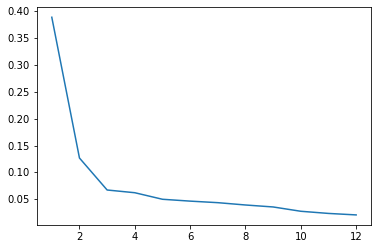

In [25]:
pca=PCA(n_components=12, svd_solver = 'auto')
pca.fit(scaled_values)
arr=[]
for i in range(pca.n_components_):
    j=i
    arr.append(j+1)
plt.plot(arr, pca.explained_variance_ratio_)

In [26]:
transformed_values=pca.fit_transform(scaled_values)
transformed_times=pca.fit_transform(scaled_times)

In [27]:
transformed_values

array([[ 3.19203281,  2.2896675 ,  0.92560534, ..., -0.60038668,
        -0.23877279, -1.93303008],
       [ 3.01726785,  2.42736805,  1.33006064, ..., -0.32070203,
         0.24479068, -0.91076979],
       [ 3.38171009,  2.30427466,  1.4395819 , ...,  0.89659768,
         0.6998512 , -0.26188443],
       ...,
       [-3.85319704,  0.11050408, -1.00985499, ..., -1.11455282,
         1.86564035, -0.82313055],
       [-3.78078475,  0.02713376, -1.44232182, ..., -0.96459382,
         2.05581633, -0.92528117],
       [-3.85081965, -0.03388796, -0.83892025, ..., -1.25081908,
         1.96612798, -0.89549952]])

In [28]:
inversed_values=pca.inverse_transform(transformed_values)
inversed_times=pca.inverse_transform(transformed_times)

In [29]:
inversed_times.shape

(1280, 21)

In [30]:
unscaled_values=scaler.inverse_transform(inversed_values)
unscaled_times=scaler.inverse_transform(inversed_times)

In [31]:
unscaled_values

array([[-4.11577622e-01,  2.24867044e-03,  3.51451428e-02, ...,
         1.16717195e-01,  4.33695518e-02, -1.09007165e-02],
       [-1.15913815e-01,  7.95016750e-02,  3.75686029e-02, ...,
         1.13661550e-01,  8.52828568e-02,  2.80914939e-02],
       [-4.76024285e-01, -9.51893444e-02,  3.74491291e-02, ...,
         9.14723138e-02,  1.15942829e-01,  1.09786880e-01],
       ...,
       [-9.03539715e-01,  2.17669265e+01,  1.01641050e-01, ...,
        -2.61759130e-02,  4.48548635e-03, -5.87051216e-03],
       [-9.12531550e-01,  2.26472948e+01,  1.48434891e-01, ...,
        -2.00666582e-02,  5.97959435e-03, -4.80227560e-03],
       [-9.02503784e-01,  2.30555489e+01,  8.94900495e-02, ...,
        -2.07395185e-02,  5.20919438e-03, -4.46004111e-03]])

In [32]:
unscaled_times

array([[-4.11577622e-01,  2.24867044e-03,  3.51451428e-02, ...,
         1.16717195e-01,  4.33695518e-02, -1.09007165e-02],
       [-1.15913815e-01,  7.95016750e-02,  3.75686029e-02, ...,
         1.13661550e-01,  8.52828568e-02,  2.80914939e-02],
       [-4.76024285e-01, -9.51893444e-02,  3.74491291e-02, ...,
         9.14723138e-02,  1.15942829e-01,  1.09786880e-01],
       ...,
       [-9.03539715e-01,  2.17669265e+01,  1.01641050e-01, ...,
        -2.61759130e-02,  4.48548635e-03, -5.87051216e-03],
       [-9.12531550e-01,  2.26472948e+01,  1.48434891e-01, ...,
        -2.00666582e-02,  5.97959435e-03, -4.80227560e-03],
       [-9.02503784e-01,  2.30555489e+01,  8.94900495e-02, ...,
        -2.07395185e-02,  5.20919438e-03, -4.46004111e-03]])